ALGORITMOS DE APRENDIZAJE NO SUPERVISADO

Integrantes :
Dalia Dominguez 
Juan Esteban 




curso 
Analisis de Datos 


Realizar un análisis exploratorio de los datos c
 

In [1]:
#carga de las librerias
import pandas as pd # manejo y analisis de estructura de datos
import numpy as np # calculo numerico y el analisis de datos 
import seaborn as sns # creacion graficos estadisticos 
import matplotlib.pyplot as plt #creacion de graficos en dos dimenciones 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')


In [2]:
#lectura de datos en python cargar variable BD
BD = pd.read_csv('Mall_Customers.csv')

In [3]:
#lectura de datos 
BD.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# mirara tamaño de la BD
BD.shape

(200, 5)

In [5]:
data=BD.drop(['Gender'], axis=1)

In [6]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [7]:
BD.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#mirar cantidad de valores nulos
data.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.dropna()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


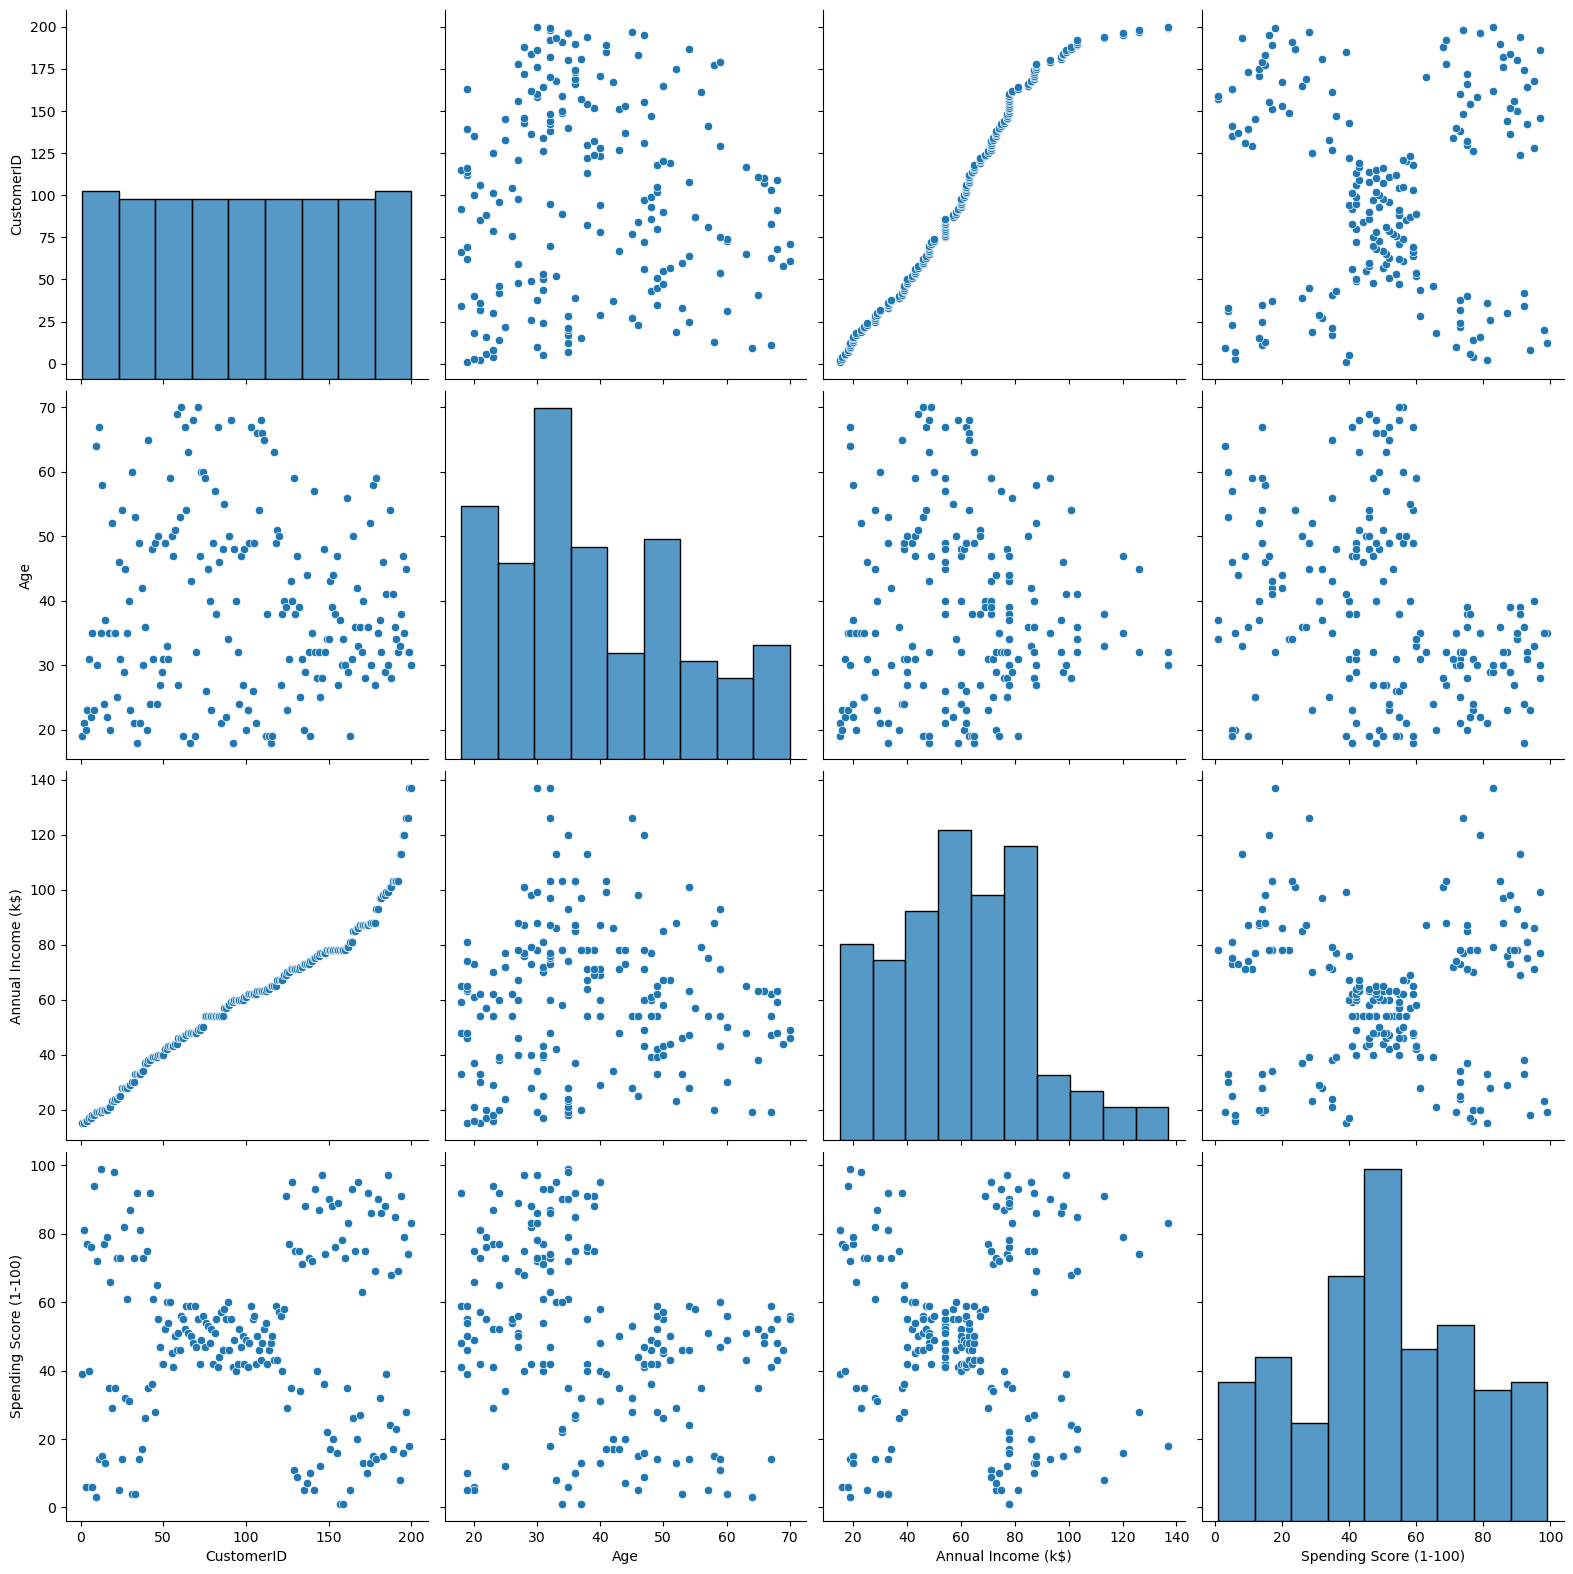

In [10]:
#diagrama de dispercion
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [10]:
#matriz de correlacion 
corr_matrix=data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


en la matriz de correlacion se puede identificar que los valores sercanos a 1 tienen una mayor correlacion 

<Axes: >

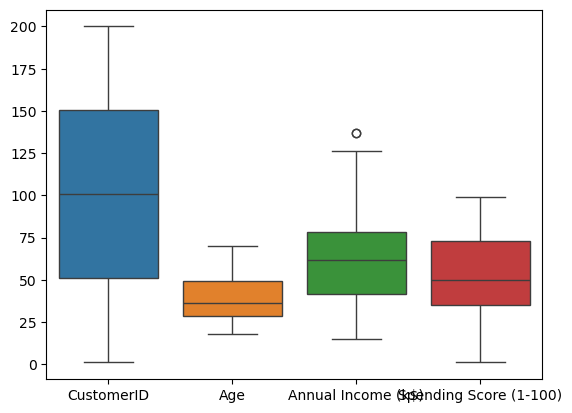

In [19]:
# diagrama de caja 
sns.boxplot(data=data)

La estandarización de datos es importante porque prepara los datos antes de aplicar el K-Means

In [11]:
# estandarizar los datos antes de aplicar  K_Means
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(data), columns =data.columns)
x


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


K_MEANS

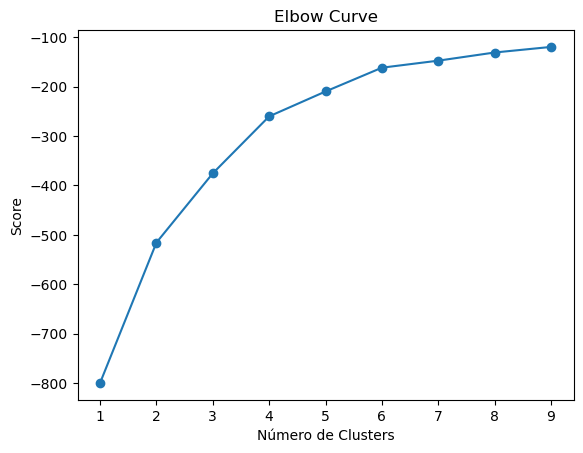

In [12]:
Nc= range (1, 10)
kmeans = [KMeans(n_clusters = i) for i in Nc]
kmeans
score =[kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score 
plt.plot(Nc,score, marker= 'o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


algoritmo de k-Means sirve para para identificar Con cuántos clúster se va a trabajar, para eso  se le da un Rango de 1 a 10. 
k-Means gráfica para que nosotros podamos identificar a partir de este método.
Para identificar a través de este método debemos tener en cuenta donde cambia drásticamente, donde  deja de ser notable.


In [13]:
kmeans = KMeans(n_clusters=6).fit(x)
centroids = kmeans.cluster_centers_
centroids

array([[-1.39565069, -0.19349404, -1.38079378, -1.05594645],
       [ 1.04747082, -0.45213014,  0.97293875,  1.21414431],
       [ 0.04137729,  0.84006897,  0.034819  , -0.1468749 ],
       [ 1.10801694,  0.01709736,  1.06533122, -1.27403228],
       [-0.87160361,  1.40508926, -0.7765843 , -0.43618796],
       [-0.78597206, -1.01154417, -0.74893094,  0.5301916 ]])

In [14]:
#obtenemos las etiquetas de cada punto de nuestro datos 
labels = kmeans.labels_
#centroides
C= kmeans.cluster_centers_
colores=['red','green','cyan','pink','blue','orange']
asignar=[]
for row in labels:
    asignar.append(colores[row])

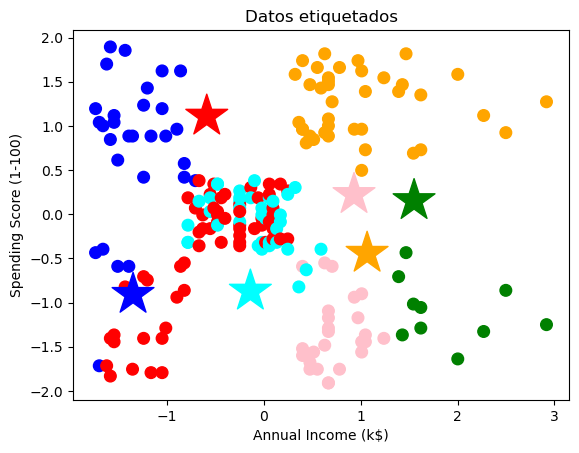

In [17]:


f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c= asignar, s= 70)
plt.scatter(C[:,0],C[:,1], marker='*', c = colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

            


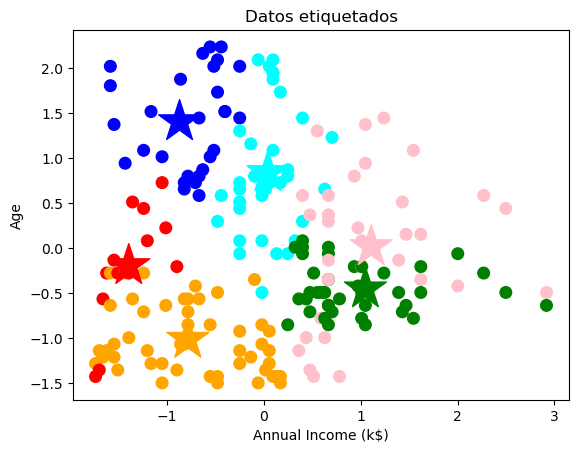

In [15]:
f1 = x['Annual Income (k$)'].values
f2 = x['Age'].values
plt.scatter(f1, f2, c= asignar, s= 70)
plt.scatter(C[:,0],C[:,1], marker='*', c = colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()


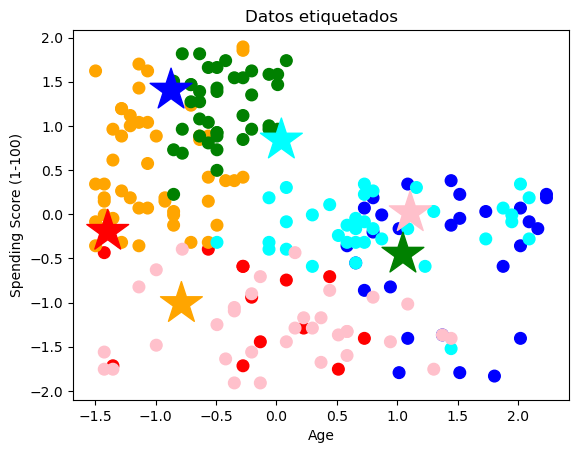

In [16]:
f1 = x['Age'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c= asignar, s= 70)
plt.scatter(C[:,0],C[:,1], marker='*', c = colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

A continuación se realiza la predicción, de que un cliente con ciertos valores pertenece al clúster 2 de color cyan.

In [17]:
x_new = scaler.fit_transform(np.array([[5,32,18,41]]))
new_label = kmeans.predict(x_new)
color=[]
for row in new_label:
    color.append(colores[row])

print(new_label)
print(color)

[2]
['cyan']


In [19]:
#calcular medidas de calidad para K_Means
print("medidas de calidad para K_Means:")
print("puntaje de silueta:", metrics.silhouette_score(x, labels))
print("indice de calinski_Harabasz:", metrics.calinski_harabasz_score(x, labels))
print("Inertia (suma de cuadrado dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels))


medidas de calidad para K_Means:
puntaje de silueta: 0.34583722306926107
indice de calinski_Harabasz: 113.52822913976752
Inertia (suma de cuadrado dentro de los clusters): 203.77050383431882
Davies-Bouldin Index: 1.0119007929618815


identificar otro cluster para comparar 

In [33]:
kmeans = KMeans(n_clusters=7).fit(x)
centroids = kmeans.cluster_centers_
centroids

array([[ 1.10728918,  0.20350983,  1.05609358, -1.27778394],
       [-0.32003975,  1.25526464, -0.26166879, -0.03158663],
       [-1.34163446, -0.97602698, -1.32549704,  1.0371827 ],
       [ 0.79155711, -0.37390445,  0.5954431 ,  1.24694853],
       [-1.33905697,  0.47895722, -1.30822992, -1.19644353],
       [ 1.47630309, -0.5203085 ,  1.60718743,  1.16464682],
       [-0.17465064, -0.8843251 , -0.143305  , -0.0638399 ]])

In [34]:
#obtenemos las etiquetas de cada punto de nuestro datos 
labels = kmeans.labels_
#centroides
C= kmeans.cluster_centers_
colores=['red','green','cyan','pink','blue','orange','black']
asignar=[]
for row in labels:
    asignar.append(colores[row])

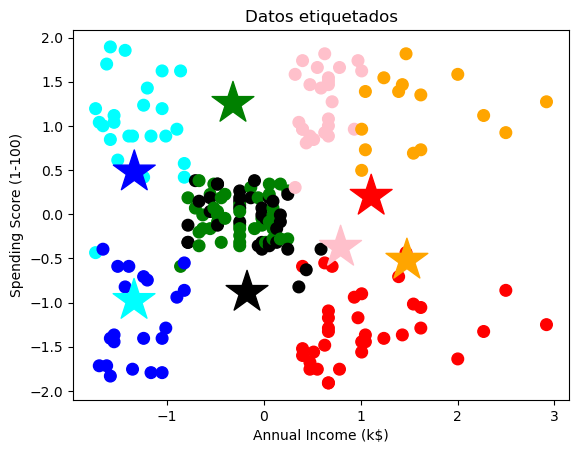

In [35]:
f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c= asignar, s= 70)
plt.scatter(C[:,0],C[:,1], marker='*', c = colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

            

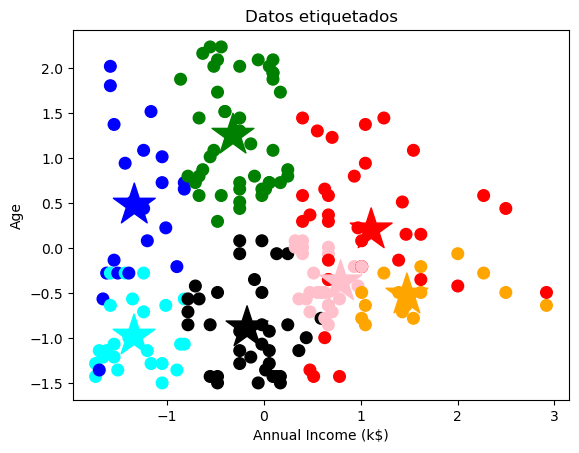

In [36]:
f1 = x['Annual Income (k$)'].values
f2 = x['Age'].values
plt.scatter(f1, f2, c= asignar, s= 70)
plt.scatter(C[:,0],C[:,1], marker='*', c = colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()


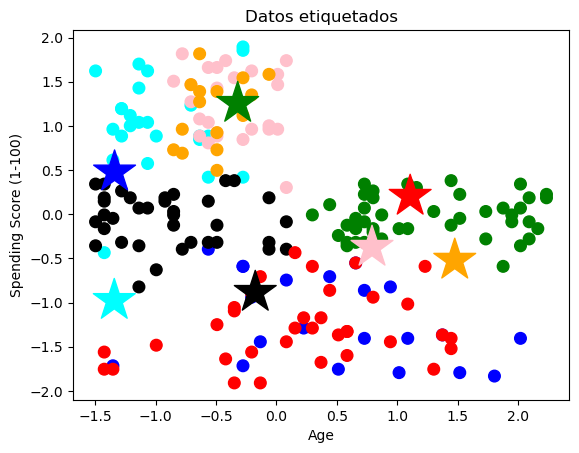

In [37]:
f1 = x['Age'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c= asignar, s= 70)
plt.scatter(C[:,0],C[:,1], marker='*', c = colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [38]:
x_new = scaler.fit_transform(np.array([[5,32,18,41]]))
new_label = kmeans.predict(x_new)
color=[]
for row in new_label:
    color.append(colores[row])

print(new_label)
print(color)

[6]
['black']


In [39]:
#calcular medidas de calidad para K_Means
print("medidas de calidad para K_Means:")
print("puntaje de silueta:", metrics.silhouette_score(x, labels))
print("indice de calinski_Harabasz:", metrics.calinski_harabasz_score(x, labels))
print("Inertia (suma de cuadrado dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels))


medidas de calidad para K_Means:
puntaje de silueta: 0.4059291335683507
indice de calinski_Harabasz: 142.6956037438781
Inertia (suma de cuadrado dentro de los clusters): 147.16344053474862
Davies-Bouldin Index: 0.8388817441835102


Interpretar, analizar y documentar los resultados obtenido

se realizaron los procesos para trabajar con 6 y 7 clúster para poder comparar valores y verificar cuales valores son los más adecuados.

Los valores del clúster 7 son los más adecuados porque:






El porcentaje de silueta del cluster 7 es mayor que el del clúster 6.
El porcentaje de calinski del cluster 7 es más alto que el del clúster 6.
El porcentaje de Inertia del cluster 7 es más bajo que el del clúster 6.
El porcentaje de Davies del cluster 7 es más bajo que el del clúster 6.


Hieraechical clustering

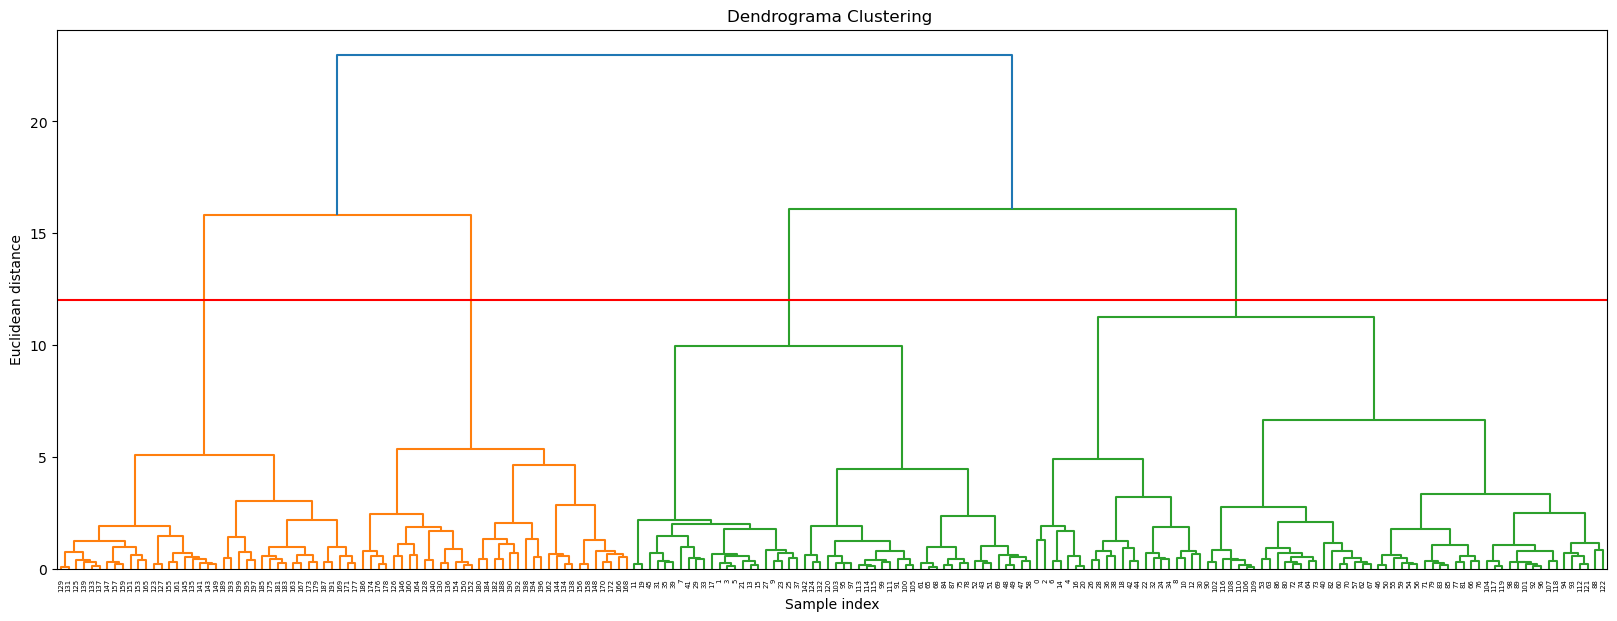

In [20]:
ward_clustering = linkage(x, method ="ward", metric = "euclidean")
plt.figure(figsize = (20,7))
dendrogram(ward_clustering)
plt.axhline(y =12, color = 'r', linestyle = '-')
plt.title('Dendrograma Clustering ')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [23]:
hier_clustering = AgglomerativeClustering(n_clusters=4)
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int64)

In [24]:
#obtenemos las etiquetas de cada punto de nuestros datos 
labels = labels_hier
colores = ['red','green','cyan','blue']
asignar =[]
for row in labels:
    asignar.append(colores[row])

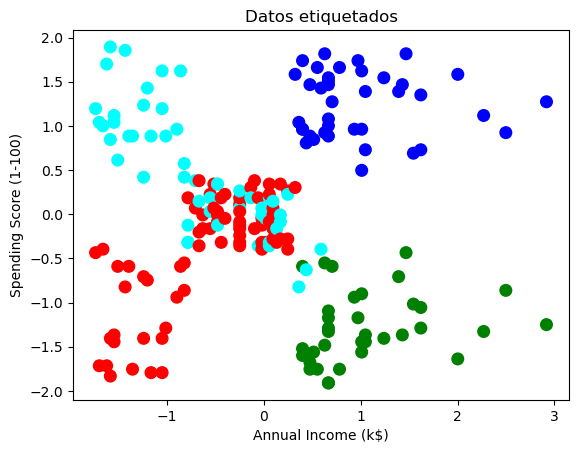

In [32]:
f1 = x['Annual Income (k$)'].values
f2 = x['Spending Score (1-100)'].values
plt.scatter(f1, f2, c= asignar, s= 70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


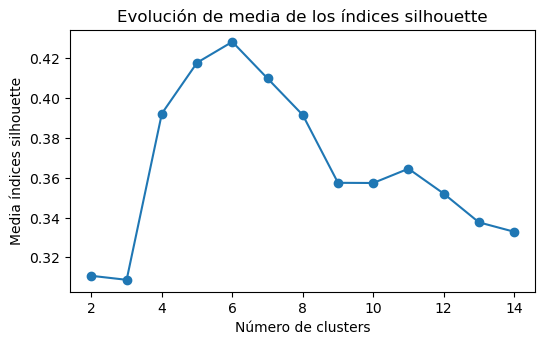

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


# Rango de número de clusters a probar
range_n_clusters = range(2, 15)

# Lista para almacenar los valores medios de silhouette
valores_medios_silhouette = []

# Iterar sobre los diferentes números de clusters
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
        metric='euclidean',  # Cambiar 'affinity' a 'metric'
        linkage='ward',
        n_clusters=n_clusters
    )
    cluster_labels = modelo.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

# Crear la gráfica de evolución de los índices silhouette
fig, ax = plt.subplots(1, 1, figsize=(6, 3.4))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Media índices silhouette')

# Mostrar la gráfica
plt.show()

In [26]:
#calcular medidas de calidad para clustering jerarquico
print("\nMedidas de calidad para clustering Jerarquico:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels_hier))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels_hier))
print("Davivies-Bouldin Index:", metrics.davies_bouldin_score(x, labels_hier))



Medidas de calidad para clustering Jerarquico:
Puntaje de silueta: 0.39231254266034143
Indice de Calinski-Harabasz: 119.44498361793892
Davivies-Bouldin Index: 0.9713829128749328


In [53]:
hier_clustering = AgglomerativeClustering(n_clusters=5)
labels_hier = hier_clustering.fit_predict(x)
labels_hier

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 4, 0,
       4, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 1, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int64)

In [54]:
#calcular medidas de calidad para clustering jerarquico
print("\nMedidas de calidad para clustering Jerarquico:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels_hier))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels_hier))
print("Davivies-Bouldin Index:", metrics.davies_bouldin_score(x, labels_hier))



Medidas de calidad para clustering Jerarquico:
Puntaje de silueta: 0.41786701492690886
Indice de Calinski-Harabasz: 128.80506347819335
Davivies-Bouldin Index: 0.850547571342671


In [55]:
#coheficiente de correlacion cofenetica
from scipy.cluster.hierarchy import linkage
#compute the distances
x_dist = pdist(x)
# compute the linkage matrix
z= linkage(x, 'ward')
#calcular el cophenetic correlation coefficient
coef_cofenetico = cophenet(z, x_dist)
print("coeficiente de correlacion cofenetica:", coef_cofenetico)


coeficiente de correlacion cofenetica: (0.644982688580315, array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))


el coeficiente de correlación compara las distancias euclidianas 
un valor cercano a 1 significa que el dendograma representa bien la distancia entre los datos 


se realizaron los procesos para trabajar con 4 y 5 clúster para poder comparar valores y verificar cuales valores son los más adecuados.

Los valores del clúster 5 son los más adecuados porque:


El porcentaje de silueta del cluster 5 es mayor que el del clúster 4.
El porcentaje de calinski del cluster 5 es más alto que el del clúster 4.
El porcentaje de Inertia del cluster 5 es más bajo que el del clúster 4. 
El porcentaje de Davies del cluster 5 es más bajo que el del clúster 4.